#Linear Regression

## Assumptions of Linear Regression
- The Dependent Variable and the Independent Variables should have a linear and additive relationship between them.
- Absence of Autocorrelation (absence of correlation in error terms)
- No or little Multicollinearity (Multicollinearity is the case in which independent variables are correlated with each other)
- Error terms should be Homoscedastic
- Error terms should be Normally Distributed

Cloning the Repository containing the dataset

In [1]:
!git clone https://github.com/Yuvnish017/Machine_Learning.git

Cloning into 'Machine_Learning'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 10 (delta 0), reused 10 (delta 0), pack-reused 0
Unpacking objects: 100% (10/10), done.


In [2]:
%cd Machine_Learning/Linear_Regression/

/content/Machine_Learning/Linear_Regression


Importing Necessary packages

In [98]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer, StandardScaler, LabelEncoder
import scipy.stats as stats
from scipy.special import boxcox1p
import pylab
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math

Loading the Life Expectancy Dataset

In [99]:
data = pd.read_csv('life_expectancy_dataset/Life Expectancy Data.csv')

In [100]:
data.head()

Country  Year  ... Income composition of resources  Schooling
0  Afghanistan  2015  ...                           0.479       10.1
1  Afghanistan  2014  ...                           0.476       10.0
2  Afghanistan  2013  ...                           0.470        9.9
3  Afghanistan  2012  ...                           0.463        9.8
4  Afghanistan  2011  ...                           0.454        9.5

[5 rows x 22 columns]

In [101]:
print(data.to_string())

                                                   Country  Year      Status  Life expectancy   Adult Mortality  infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles    BMI   under-five deaths   Polio  Total expenditure  Diphtheria    HIV/AIDS            GDP    Population   thinness  1-19 years   thinness 5-9 years  Income composition of resources  Schooling
0                                              Afghanistan  2015  Developing              65.0            263.0             62     0.01               71.279624         65.0      1154   19.1                  83    6.0               8.16         65.0        0.1     584.259210  3.373649e+07                   17.2                 17.3                            0.479       10.1
1                                              Afghanistan  2014  Developing              59.9            271.0             64     0.01               73.523582         62.0       492   18.6                  86   58.0               8.18         62

In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

Deleting irrelevant Columns

In [103]:
data.pop('Country')
data.pop('Year')

0       2015
1       2014
2       2013
3       2012
4       2011
        ... 
2933    2004
2934    2003
2935    2002
2936    2001
2937    2000
Name: Year, Length: 2938, dtype: int64

Encoding Non-Numerical Data

In [104]:
encoder = LabelEncoder()
data['Status'] = encoder.fit_transform(data['Status'])

In [105]:
data.head()

Status  Life expectancy   ...  Income composition of resources  Schooling
0       1              65.0  ...                            0.479       10.1
1       1              59.9  ...                            0.476       10.0
2       1              59.9  ...                            0.470        9.9
3       1              59.5  ...                            0.463        9.8
4       1              59.2  ...                            0.454        9.5

[5 rows x 20 columns]

Droping Empty Rows and Duplicate Rows

In [106]:
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1649 entries, 0 to 2937
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Status                           1649 non-null   int64  
 1   Life expectancy                  1649 non-null   float64
 2   Adult Mortality                  1649 non-null   float64
 3   infant deaths                    1649 non-null   int64  
 4   Alcohol                          1649 non-null   float64
 5   percentage expenditure           1649 non-null   float64
 6   Hepatitis B                      1649 non-null   float64
 7   Measles                          1649 non-null   int64  
 8    BMI                             1649 non-null   float64
 9   under-five deaths                1649 non-null   int64  
 10  Polio                            1649 non-null   float64
 11  Total expenditure                1649 non-null   float64
 12  Diphtheria          

Scatter Plots of One Variable vs the Other

<Figure size 1440x1440 with 0 Axes>

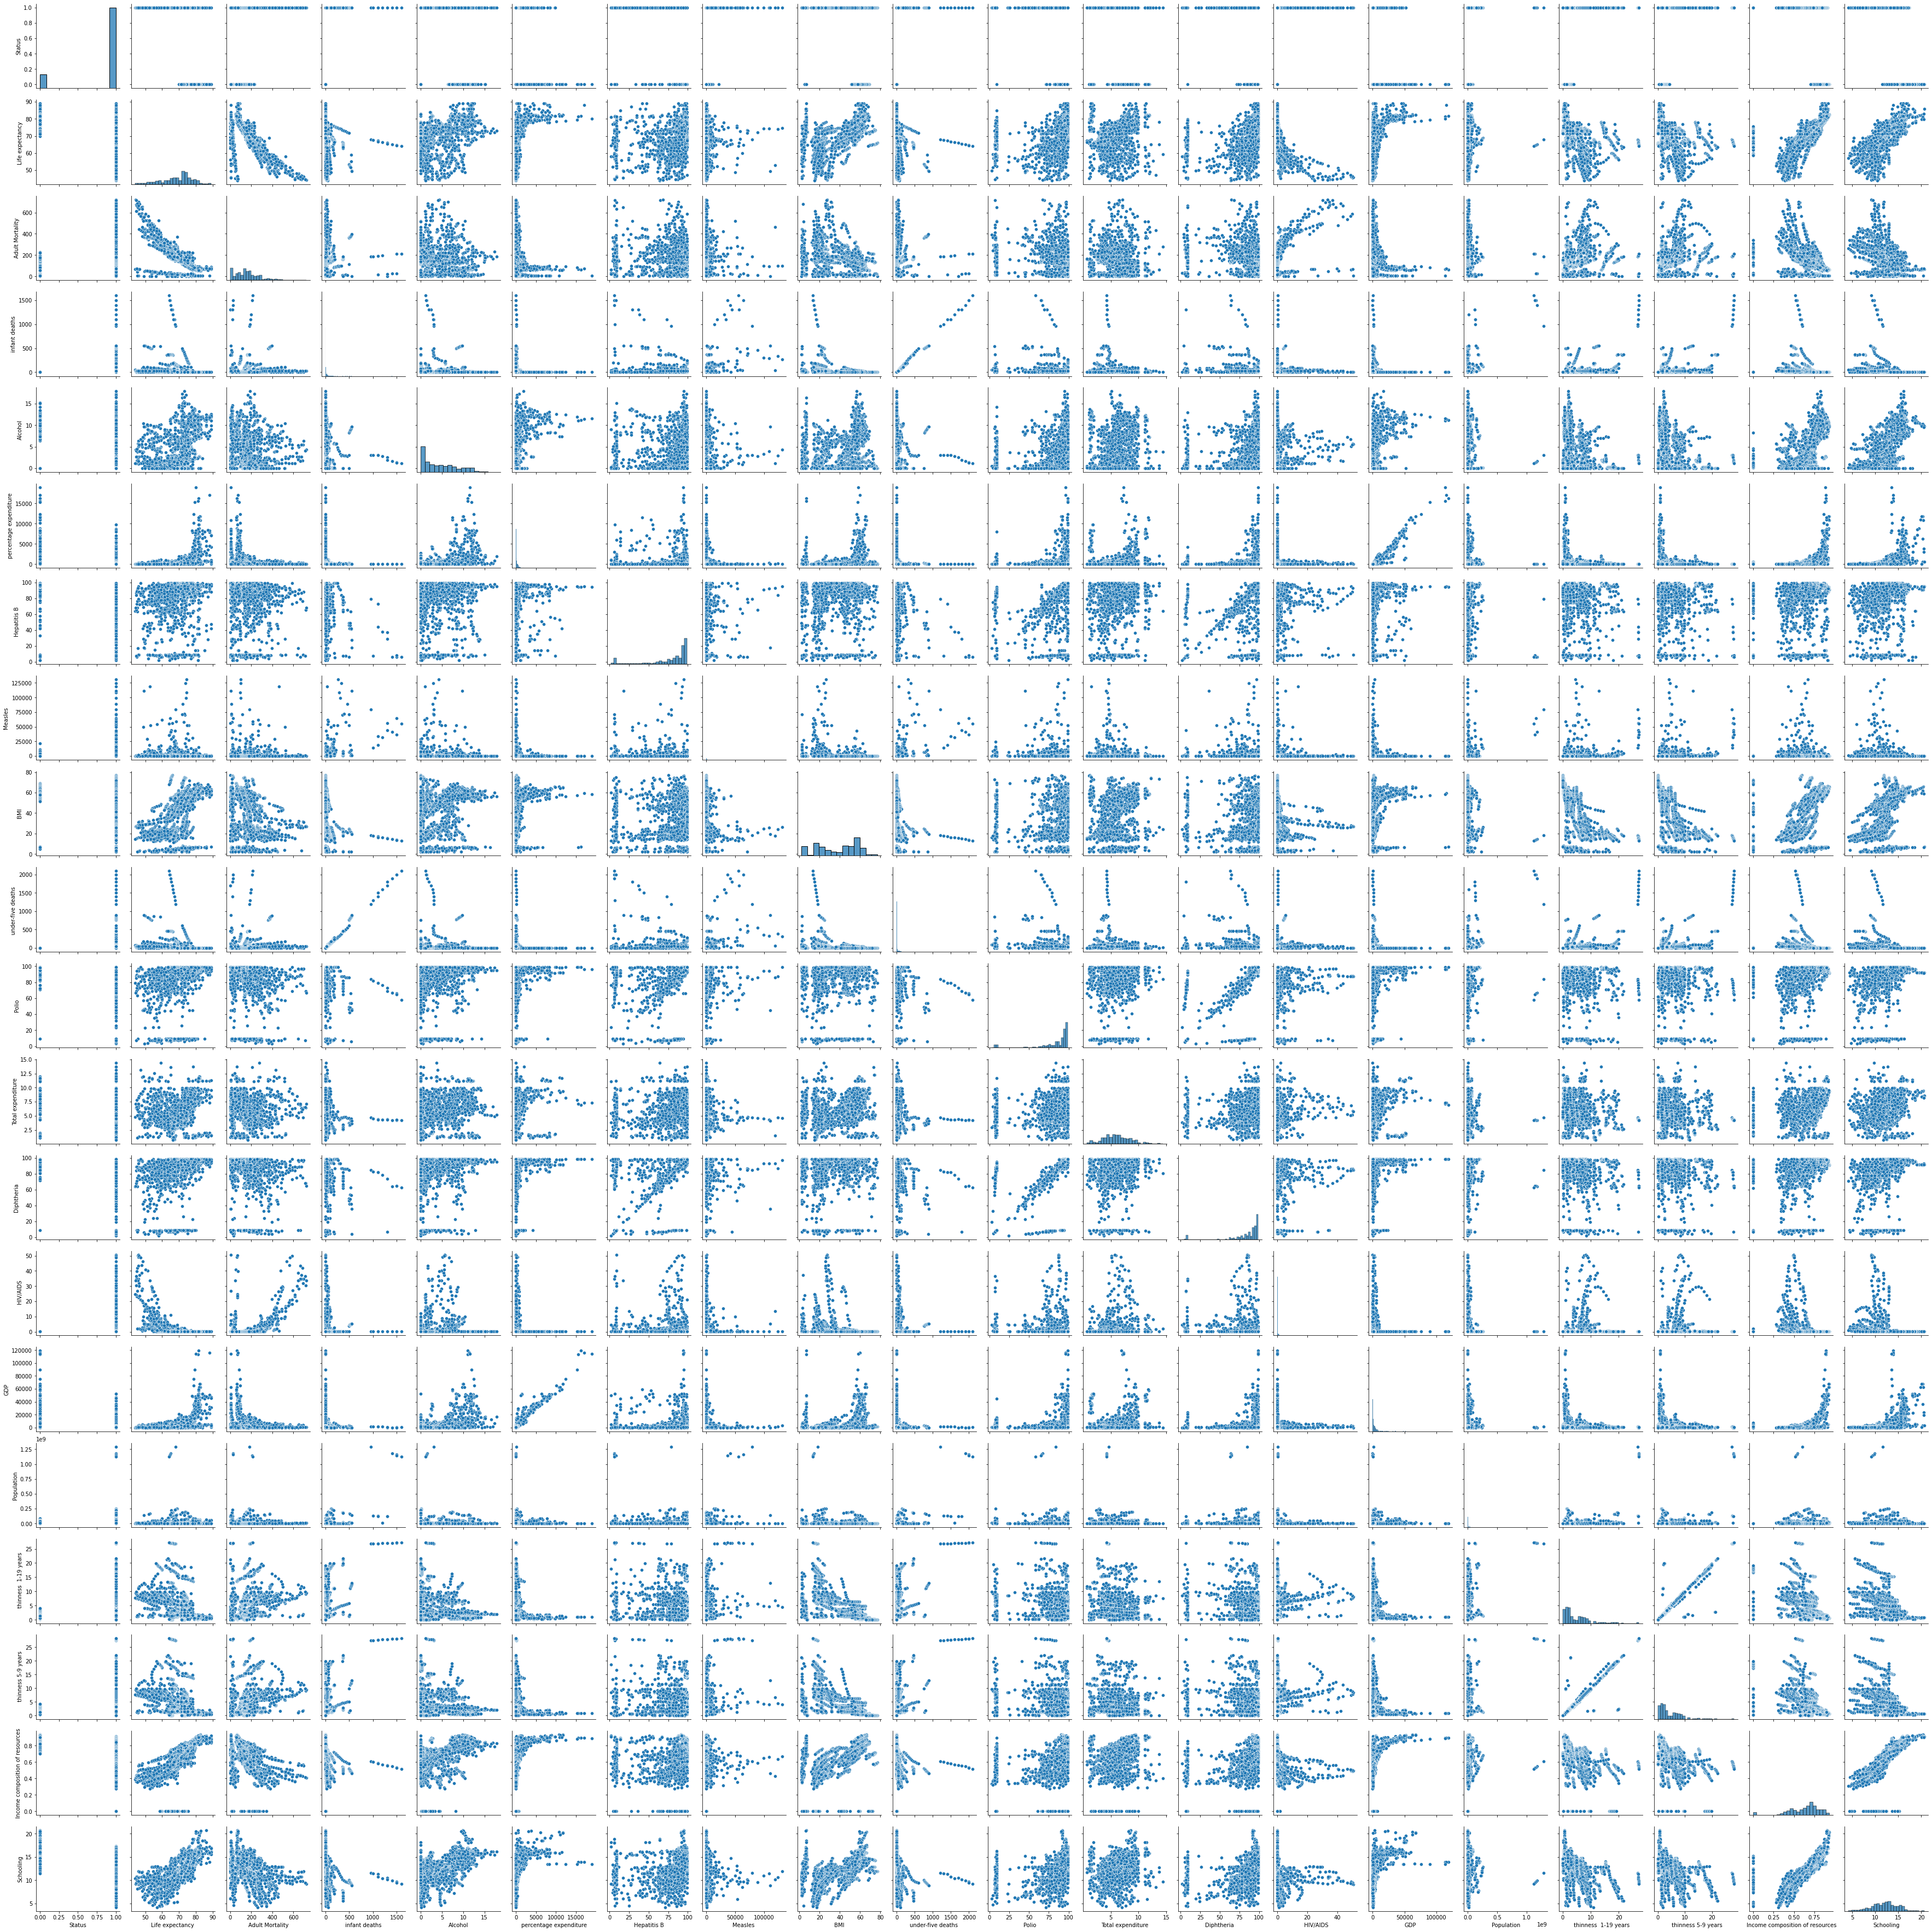

In [14]:
figure = plt.figure(figsize=(20, 20))
sns.pairplot(data)
plt.show()

Correlation Matrix of the Data

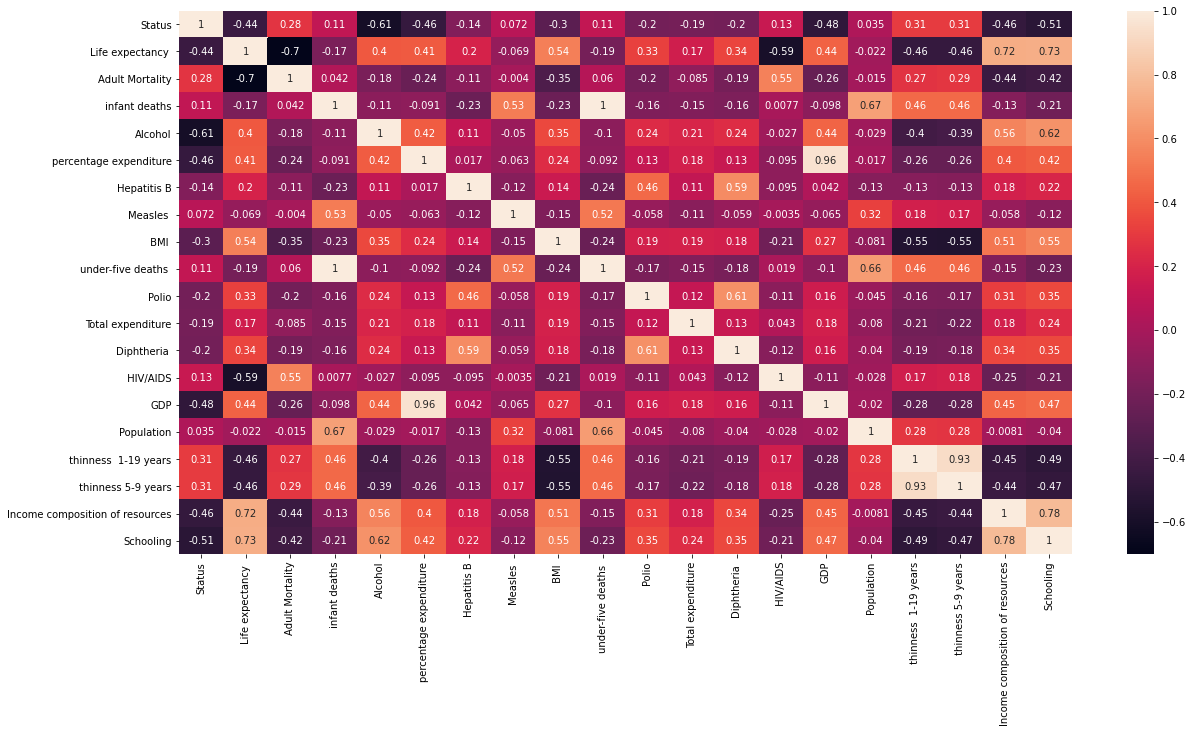

In [107]:
figure = plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(), annot=True)
plt.show()

Histograms of Variables

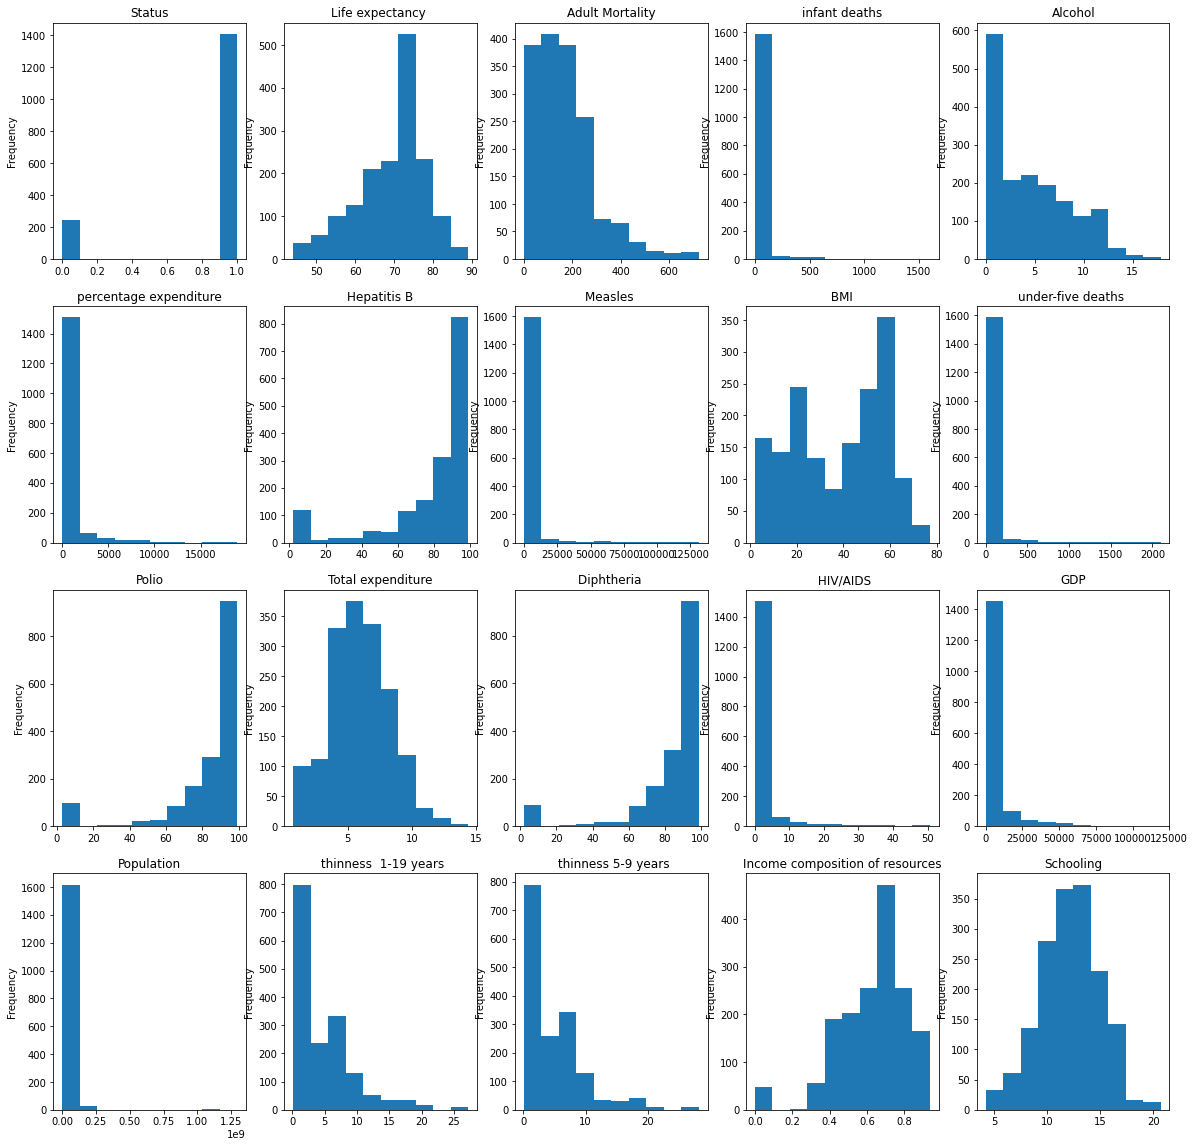

In [108]:
figure = plt.figure(figsize=(20, 20))
l = list(data)
for i in range(20):
  plt.subplot(4, 5, i+1)
  data[l[i]].plot(kind='hist')
  plt.title(l[i])
plt.show()

Skewness of Variables

In [109]:
data.skew()

Status                             -1.998327
Life expectancy                    -0.628758
Adult Mortality                     1.276429
infant deaths                       8.477369
Alcohol                             0.662518
percentage expenditure              4.980574
Hepatitis B                        -1.793377
Measles                             7.957838
 BMI                               -0.233601
under-five deaths                   8.340863
Polio                              -2.360177
Total expenditure                   0.213362
Diphtheria                         -2.487492
 HIV/AIDS                           4.974176
GDP                                 4.517297
Population                         14.186299
 thinness  1-19 years               1.821074
 thinness 5-9 years                 1.866980
Income composition of resources    -1.155244
Schooling                          -0.128164
dtype: float64

Scatter Plots of Dependent Variable vs Independent Variable

['Status', 'Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']


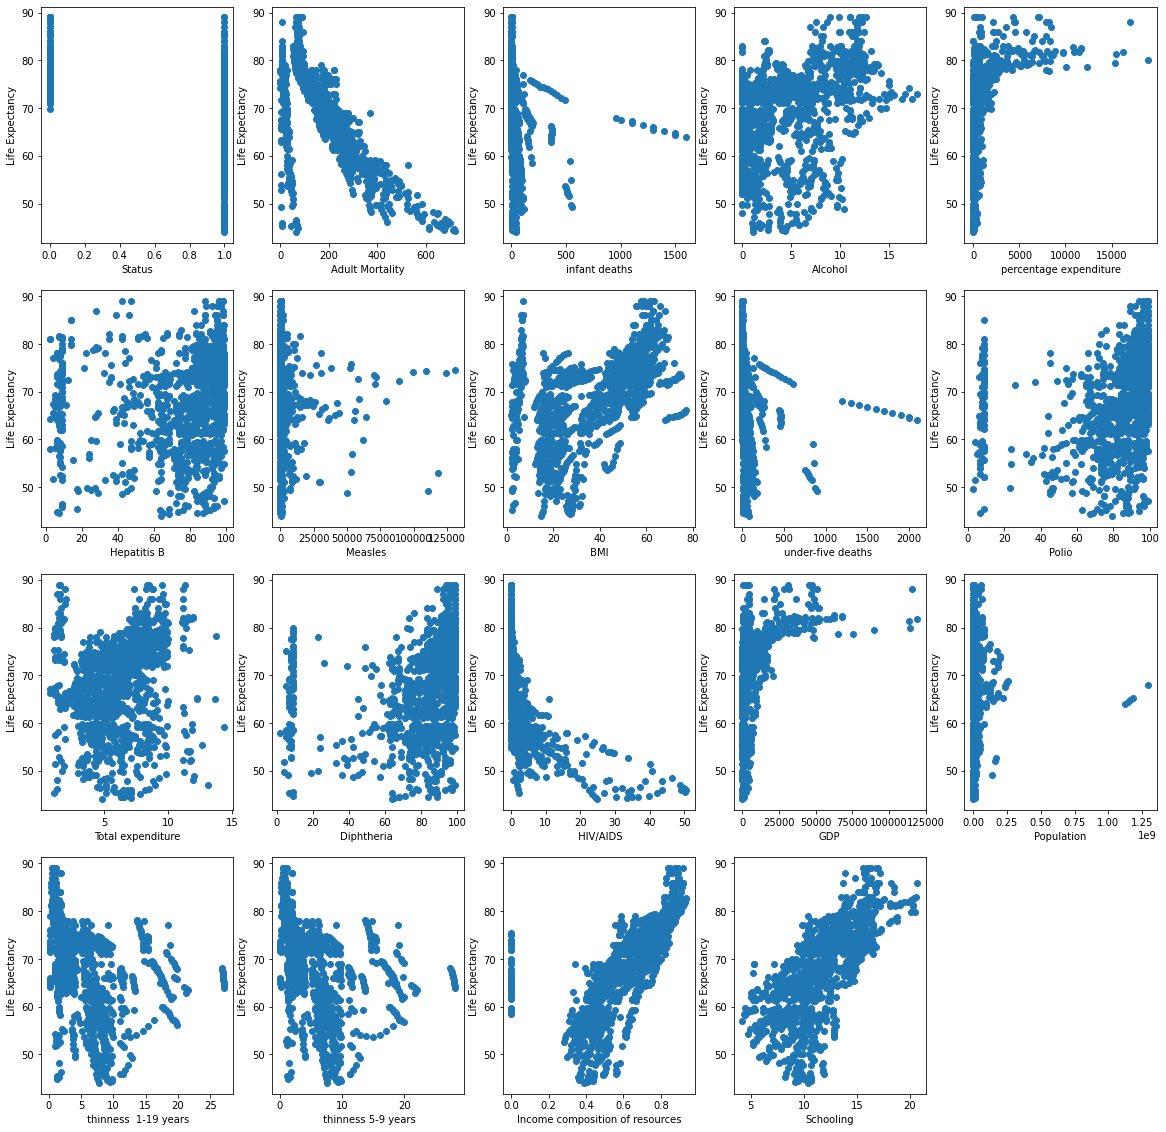

In [110]:
figure = plt.figure(figsize=(20, 20))
l = list(data)
print(l)
l.remove('Life expectancy ')
j = 1
for i in l:
  plt.subplot(4, 5, j)
  plt.scatter(data[i], data['Life expectancy '])
  plt.xlabel(i)
  plt.ylabel('Life Expectancy')
  j += 1
plt.show()

Seperating the Independent Variables and Dependent Variable

In [111]:
data_copy = data[:]
Y = data_copy.pop('Life expectancy ')
X = data_copy

In [112]:
X.head()

Status  Adult Mortality  ...  Income composition of resources  Schooling
0       1            263.0  ...                            0.479       10.1
1       1            271.0  ...                            0.476       10.0
2       1            268.0  ...                            0.470        9.9
3       1            272.0  ...                            0.463        9.8
4       1            275.0  ...                            0.454        9.5

[5 rows x 19 columns]

In [113]:
Y.head()

0    65.0
1    59.9
2    59.9
3    59.5
4    59.2
Name: Life expectancy , dtype: float64

Standardizing the Data

In [114]:
scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.fit_transform(X_test)
X = scaler.fit_transform(X)

Splitting the Data into Train and Test Set

In [115]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(1319, 19)
(1319,)
(330, 19)
(330,)


Calculating the VIF Scores for Variables for Multi-Collinearity Check

In [116]:
def calcVIF(X):
  vif = pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  vif = vif.sort_values(by='VIF', ascending=False)
  return(vif)

In [117]:
X_train_copy = pd.DataFrame(X, columns=data_copy.columns).iloc[:,:-1]
calcVIF(X_train_copy)

variables         VIF
2                     infant deaths  211.806357
8                under-five deaths   201.412136
13                              GDP   13.470966
4            percentage expenditure   12.810375
15             thinness  1-19 years    7.581471
16               thinness 5-9 years    7.573711
17  Income composition of resources    2.229651
3                           Alcohol    2.151910
11                      Diphtheria     2.093692
14                       Population    1.934225
0                            Status    1.822996
1                   Adult Mortality    1.793186
7                              BMI     1.727693
9                             Polio    1.701058
5                       Hepatitis B    1.660739
6                          Measles     1.514190
12                         HIV/AIDS    1.482823
10                Total expenditure    1.113735

Training the Linear Regression Model

In [118]:
clf = LinearRegression()
clf.fit(X_train, Y_train)

ypred_train = clf.predict(X_train)
print(r2_score(Y_train, ypred_train))
ypred = clf.predict(X_test)
print(r2_score(Y_test, ypred))

0.8332743679527943
0.840386833639686


Getting the Residuals

In [119]:
residuals_train = Y_train - ypred_train
residuals_test = Y_test - ypred

Residual vs Fitted Value Plot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


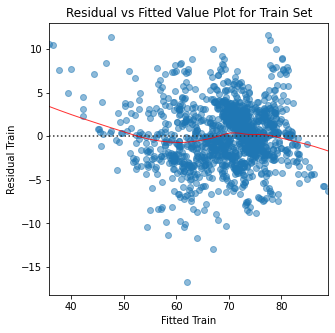

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


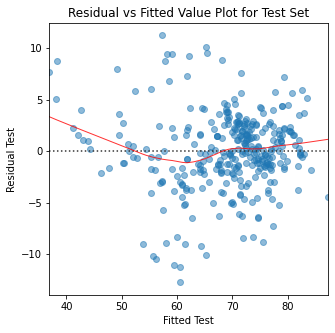

In [120]:
figure1 = plt.figure(figsize=(5, 5))
# plt.scatter(residuals_train, Y_train)
sns.residplot(ypred_train, residuals_train, lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.xlabel('Fitted Train')
plt.ylabel('Residual Train')
plt.title('Residual vs Fitted Value Plot for Train Set')
plt.show()

figure2 = plt.figure(figsize=(5, 5))
# plt.scatter(residuals_test, ypred)
sns.residplot(ypred, residuals_test, lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.xlabel('Fitted Test')
plt.ylabel('Residual Test')
plt.title('Residual vs Fitted Value Plot for Test Set')
plt.show()

Normal Q-Q Plot

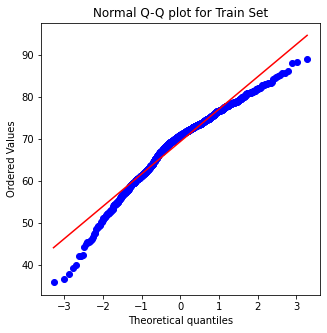

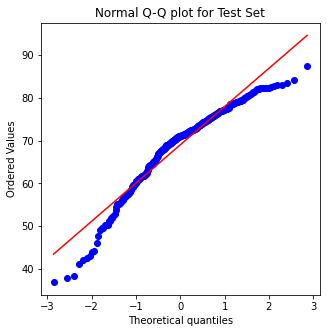

In [121]:
figure1 = plt.figure(figsize=(5, 5))
stats.probplot(ypred_train, plot=pylab)
plt.title('Normal Q-Q plot for Train Set')
plt.show()

figure2 = plt.figure(figsize=(5, 5))
stats.probplot(ypred, plot=pylab)
plt.title('Normal Q-Q plot for Test Set')
plt.show()

Scale Location Plot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


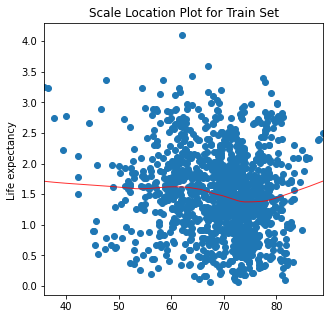

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


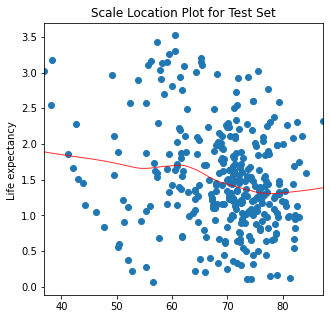

In [122]:
figure1 = plt.figure(figsize=(5, 5))
plt.scatter(ypred_train, np.sqrt(np.abs(residuals_train)))
sns.regplot(ypred_train, np.sqrt(np.abs(residuals_train)), scatter=False, ci=False, lowess=True, line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.title('Scale Location Plot for Train Set')
plt.show()

figure2 = plt.figure(figsize=(5, 5))
plt.scatter(ypred, np.sqrt(np.abs(residuals_test)))
sns.regplot(ypred, np.sqrt(np.abs(residuals_test)), scatter=False, ci=False, lowess=True, line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.title('Scale Location Plot for Test Set')
plt.show()

Removing Correlated Variables

In [125]:
data_copy = data[:]
data_copy.head()

Status  Life expectancy   ...  Income composition of resources  Schooling
0       1              65.0  ...                            0.479       10.1
1       1              59.9  ...                            0.476       10.0
2       1              59.9  ...                            0.470        9.9
3       1              59.5  ...                            0.463        9.8
4       1              59.2  ...                            0.454        9.5

[5 rows x 20 columns]

Removing the columns with lables Infant Deaths, Under-five Deaths, GDP and combining thinness 1-19 years and thinness 5-9 years columns

In [126]:
data_copy = data_copy.drop(['infant deaths'], axis=1)
data_copy = data_copy.drop(['under-five deaths '], axis=1)
data_copy = data_copy.drop(['GDP'], axis=1)
data_copy['thinness'] = data_copy[' thinness  1-19 years'] + data_copy[' thinness 5-9 years']
data_copy = data_copy.drop([' thinness  1-19 years'], axis=1)
data_copy = data_copy.drop([' thinness 5-9 years'], axis=1)

In [127]:
data_copy.head()

Status  Life expectancy   ...  Schooling  thinness
0       1              65.0  ...       10.1      34.5
1       1              59.9  ...       10.0      35.0
2       1              59.9  ...        9.9      35.4
3       1              59.5  ...        9.8      35.9
4       1              59.2  ...        9.5      36.4

[5 rows x 16 columns]

Seperating the Independent and Dependent Variables

In [128]:
Y = data_copy.pop('Life expectancy ')
X = data_copy[:]

Standardizing the Data

In [129]:
scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.fit_transform(X_test)
X = scaler.fit_transform(X)

VIF Score for Modified Data

In [130]:
X_copy = pd.DataFrame(X, columns=data_copy.columns).iloc[:,:-1]
calcVIF(X_copy)

variables       VIF
13                        Schooling  3.436228
12  Income composition of resources  2.921196
2                           Alcohol  2.153835
9                       Diphtheria   2.066413
0                            Status  1.823254
1                   Adult Mortality  1.780049
7                             Polio  1.697130
4                       Hepatitis B  1.645556
6                              BMI   1.546471
10                         HIV/AIDS  1.474765
3            percentage expenditure  1.401642
5                          Measles   1.158706
11                       Population  1.133356
8                 Total expenditure  1.110319

Splitting Train and Test Set

In [131]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(1319, 15)
(1319,)
(330, 15)
(330,)


Training the Classifier

In [134]:
clf = LinearRegression()
clf.fit(X_train, Y_train)

ypred_train = clf.predict(X_train)
print(f'R-squared score on Train Set : {r2_score(Y_train, ypred_train)}')
ypred = clf.predict(X_test)
print(f'R-squared Score on Test Set : {r2_score(Y_test, ypred)}')

R-squared score on Train Set : 0.8273298568528331
R-squared Score on Test Set : 0.8192424801041215


In [135]:
residuals_train = Y_train - ypred_train
residuals_test = Y_test - ypred

Residual vs Fitted Value Plot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


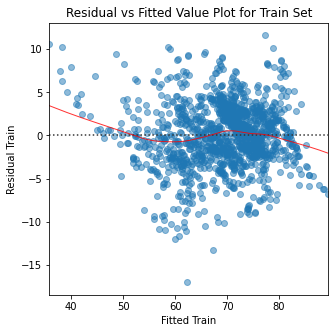

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


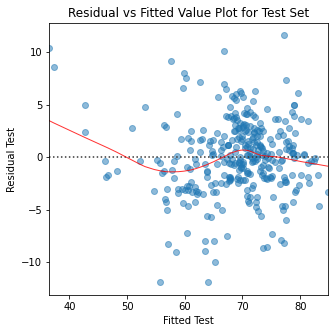

In [136]:
figure1 = plt.figure(figsize=(5, 5))
# plt.scatter(residuals_train, Y_train)
sns.residplot(ypred_train, residuals_train, lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.xlabel('Fitted Train')
plt.ylabel('Residual Train')
plt.title('Residual vs Fitted Value Plot for Train Set')
plt.show()

figure2 = plt.figure(figsize=(5, 5))
# plt.scatter(residuals_test, ypred)
sns.residplot(ypred, residuals_test, lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.xlabel('Fitted Test')
plt.ylabel('Residual Test')
plt.title('Residual vs Fitted Value Plot for Test Set')
plt.show()

Normal Q-Q Plot

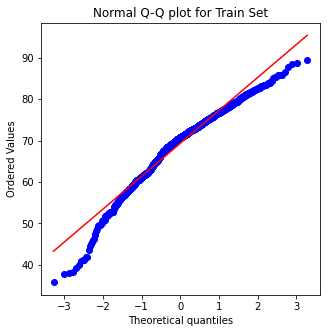

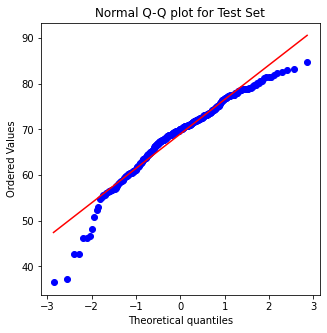

In [137]:
figure1 = plt.figure(figsize=(5, 5))
stats.probplot(ypred_train, plot=pylab)
plt.title('Normal Q-Q plot for Train Set')
plt.show()

figure2 = plt.figure(figsize=(5, 5))
stats.probplot(ypred, plot=pylab)
plt.title('Normal Q-Q plot for Test Set')
plt.show()

Scale Location Plot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


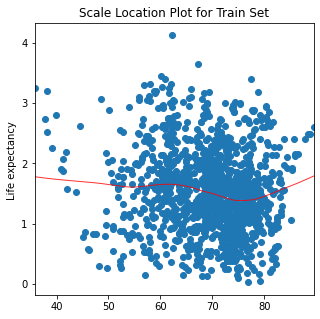

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


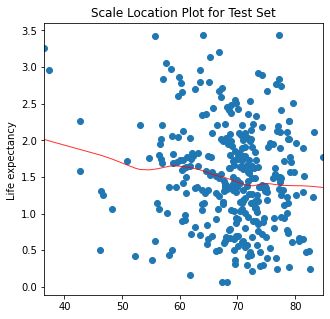

In [138]:
figure1 = plt.figure(figsize=(5, 5))
plt.scatter(ypred_train, np.sqrt(np.abs(residuals_train)))
sns.regplot(ypred_train, np.sqrt(np.abs(residuals_train)), scatter=False, ci=False, lowess=True, line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.title('Scale Location Plot for Train Set')
plt.show()

figure2 = plt.figure(figsize=(5, 5))
plt.scatter(ypred, np.sqrt(np.abs(residuals_test)))
sns.regplot(ypred, np.sqrt(np.abs(residuals_test)), scatter=False, ci=False, lowess=True, line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.title('Scale Location Plot for Test Set')
plt.show()